In [1]:
#     This program is free software: you can redistribute it and/or modify
#     it under the terms of the GNU General Public License as published by
#     the Free Software Foundation, either version 3 of the License, or
#     (at your option) any later version.
#
#     This program is distributed in the hope that it will be useful,
#     but WITHOUT ANY WARRANTY; without even the implied warranty of
#     MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#     GNU General Public License for more details.
#
#     You should have received a copy of the GNU General Public License
#     along with this program.  If not, see <https://www.gnu.org/licenses/>.

#     Written by Charalambos (Charis) Poullis - www.poullis.org

In [23]:
import numpy as np
#plotting etc
import matplotlib
import matplotlib.pyplot as plt
#random number generator
import random

#progress bar
import tqdm

# There is a weird crash in Python 3.9 causing the kernel to restart when using matplotlib
# To test if you have the same issue uncomment the following command. If it works, then you don't need the subsequent 2 lines (import os, KMP)
#plt.subplot()
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [24]:
def func(x):
    return pow(x,4.0)-2.5*pow(x, 3.0)+1.5*x

In [42]:
def gradientDescent():
    #Number of iterations
    EPOCHS = 50
    #Step h
    h_step = 0.001
    #Update step
    update_step = 0.01
    #Initial values
    x = np.random.uniform(-1,4)
    #Keep track of all the updates
    x_updates = [x]
    print(f'Initial x: {x}, Initial eval: {func(x)}') 
    
    #Create a progress bar the size of the number of epochs
    status_bar = tqdm.tqdm(range(EPOCHS), ncols=100, desc='current x: ')
    for i in status_bar:
        #Calculate the gradient
        eval_x = func(x) 
        eval_x_plus_h = func(x+h_step)
        gradient = (eval_x_plus_h - eval_x)/h_step
        #update the value of x
        x += -gradient * update_step
        #save the update
        x_updates.append(x)

        if i % 100 == 0:
            #After every epoch update the information
            status_bar.set_description(f'current x: {x:.8f} -> func(x)={func(x):.8f}')

    print(f'Optimal x: {x}, Final eval: {func(x)}') 
    return x_updates

In [43]:
x_updates = gradientDescent()

Initial x: 0.06595461689785997, Initial eval: 0.09823358959342009


current x: 0.05127410 -> func(x)=0.07658106: 100%|███████████████| 50/50 [00:00<00:00, 49979.79it/s]

Optimal x: -0.3846495319549077, Final eval: -0.4128062321377832


In [44]:
#Plot the function
x = np.linspace(-1, 2.5, 10000)
y = func(x)

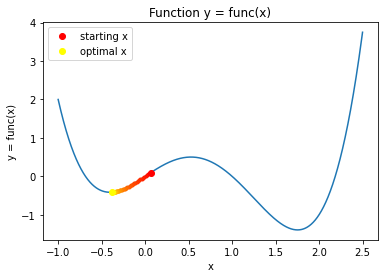

In [46]:
#Plot the loss as a function of epochs
fig, ax = plt.subplots(1,1)
#plot the function
ax.plot(x, y)
#Calculate the colors for the points
start_color = np.array([1.0, 0.0, 0.0])
end_color = np.array([1.0, 1.0, 0.0])
interpolated_colors = np.linspace(start_color, end_color, len(x_updates)).tolist()
for i in range(1, len(x_updates)-1):
    alpha = i/len(x_updates)
    ax.plot(x_updates[i], func(x_updates[i]), marker=".", color=interpolated_colors[i])

ax.plot(x_updates[0], func(x_updates[0]), 'o', color=start_color, label="starting x")
ax.plot(x_updates[-1], func(x_updates[-1]), 'o', color=end_color, label="optimal x")
ax.set_title('Function y = func(x)')
ax.set_xlabel('x')
ax.set_ylabel('y = func(x)')
ax.legend()
plt.show()
fig.savefig("function.png")